In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm import tqdm, trange
from sklearn.metrics import confusion_matrix
from scipy.stats import poisson, norm
from copy import deepcopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.decomposition import PCA
import sys
import pickle
import blip_analysis as ba
import exp_blip_models as em
from scipy.cluster.hierarchy import dendrogram, linkage
import daskify
import dask
from scipy.stats import skewnorm, mannwhitneyu
import scipy
import matplotlib
from sklearn.manifold import LocallyLinearEmbedding, MDS
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from scipy.spatial import distance_matrix
import openephys as oe
from scipy.stats import ttest_ind
import importlib
importlib.reload(em)
importlib.reload(ba)

<module 'blip_analysis' from '/home/camp/warnert/working/Recordings/binary_pulses/blip_analysis/blip_analysis.py'>

In [2]:
unit_usrt1, unit_usrt2, unit_usrt3 = ba.load_usrts()

Found odour 1
Found odour 3
Found odour 5


In [3]:
glyphs = ba.get_glyphs()
good_indexes = ba.get_stable_resp_indexes()

In [107]:
dasked = daskify.Daskified()
dasked.start_cluster()


/camp/home/warnert/.conda/envs/blip_manu/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44855 instead
  http_address["port"], self.http_server.port


In [108]:
client = dasked.client

In [103]:
scores1_conc = []
scores1_onset = []
scores2_conc = []
scores2_onset = []
scores3_conc = []
scores3_onset = []

preds_conc1 = []
preds_onset1 = []
preds_conc2 = []
preds_onset2 = []
preds_conc3 = []
preds_onset3 = []

scores_cao1 = []
scores_cao2 = []
scores_cao3 = []
scores_full1 = []
scores_full2 = []
scores_full3 = []

preds_cao1 = []
preds_cao2 = []
preds_cao3 = []
preds_full1 = []
preds_full2 = []
preds_full3 = []

full_models1 = []
full_models2 = []
full_models3 = []

cao_models1 = []
cao_models2 = []
cao_models3 = []

conc_models1 = []
conc_models2 = []
conc_models3 = []

onset_models1 = []
onset_models2 = []
onset_models3 = []

for i in trange(145, leave=False, position=0):
    model1_conc = em.ExponentialCustomTrialArray(unit_usrt1, i, conc_array)
    model1_conc.fit()
    scores1_conc.append(model1_conc.fit_score)
    preds_conc1.append(model1_conc.pred_resp)
    conc_models1.append(model1_conc)
    
    model2_conc = em.ExponentialCustomTrialArray(unit_usrt2, i, conc_array)
    model2_conc.fit()
    scores2_conc.append(model2_conc.fit_score)
    preds_conc2.append(model2_conc.pred_resp)
    conc_models2.append(model2_conc)
    
    model3_conc = em.ExponentialCustomTrialArray(unit_usrt3, i, conc_array)
    model3_conc.fit()
    scores3_conc.append(model3_conc.fit_score)
    preds_conc3.append(model3_conc.pred_resp)
    conc_models3.append(model3_conc)
    
    model1_onset = em.ExponentialCustomTrialArray(unit_usrt1, i, onset_array)
    model1_onset.fit()
    scores1_onset.append(model1_onset.fit_score)
    preds_onset1.append(model1_onset.pred_resp)
    onset_models1.append(model1_onset)
    
    model2_onset = em.ExponentialCustomTrialArray(unit_usrt2, i, onset_array)
    model2_onset.fit()
    scores2_onset.append(model2_onset.fit_score)
    preds_onset2.append(model2_onset.pred_resp)
    onset_models2.append(model2_onset)
    
    model3_onset = em.ExponentialCustomTrialArray(unit_usrt3, i, onset_array)
    model3_onset.fit()
    scores3_onset.append(model3_onset.fit_score)
    preds_onset3.append(model3_onset.pred_resp)
    onset_models3.append(model3_onset)
    
    model1_cao = em.ExponentialCustomTrialArray(unit_usrt1, i, joined_array)
    model1_cao.fit()
    scores_cao1.append(model1_cao.fit_score)
    preds_cao1.append(model1_cao.pred_resp)
    cao_models1.append(model1_cao)
    
    model2_cao = em.ExponentialCustomTrialArray(unit_usrt2, i, joined_array)
    model2_cao.fit()
    scores_cao2.append(model2_cao.fit_score)
    preds_cao2.append(model2_cao.pred_resp)
    cao_models2.append(model2_cao)
    
    model3_cao = em.ExponentialCustomTrialArray(unit_usrt3, i, joined_array)
    model3_cao.fit()
    scores_cao3.append(model3_cao.fit_score)
    preds_cao3.append(model3_cao.pred_resp)
    cao_models3.append(model3_cao)    

    model1_full = em.ExponentialCustomTrialArray(unit_usrt1, i, full_array)
    model1_full.fit()
    scores_full1.append(model1_full.fit_score)
    preds_full1.append(model1_full.pred_resp)
    full_models1.append(model1_full)
    
    model2_full = em.ExponentialCustomTrialArray(unit_usrt2, i, full_array)
    model2_full.fit()
    scores_full2.append(model2_full.fit_score)
    preds_full2.append(model2_full.pred_resp)
    full_models2.append(model2_full)    

    model3_full = em.ExponentialCustomTrialArray(unit_usrt3, i, full_array)
    model3_full.fit()
    scores_full3.append(model3_full.fit_score)
    preds_full3.append(model3_full.pred_resp)
    full_models3.append(model3_full)

In [241]:
pickle.dump(conc_models1, open("221209_conc_models1.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(conc_models2, open("221209_conc_models2.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(conc_models3, open("221209_conc_models3.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)

pickle.dump(onset_models1, open("221209_onset_models1.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(onset_models2, open("221209_onset_models2.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(onset_models3, open("221209_onset_models3.pkl", 'wb'), protocol=pickle.DEFAULT_PROTOCOL)


In [161]:
print(conc_models1[0].test_scores.shape)

(100, 32)


In [ ]:
def dask_fit_split(model_name, model_index):
    models = pickle.Unpickler(open(model_name, 'rb')).load()
    model = models[model_index]
    model.fit_split()
    

In [62]:
pickle.dump(cao_models1, open('221209_cao_models1.pkl', 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(cao_models2, open('221209_cao_models2.pkl', 'wb'), protocol=pickle.DEFAULT_PROTOCOL)
pickle.dump(cao_models3, open('221209_cao_models3.pkl', 'wb'), protocol=pickle.DEFAULT_PROTOCOL)

In [40]:
all_scores = np.concatenate([scores_full1, scores_full2, scores_full3])
all_full_models = np.concatenate([full_models1, full_models2, full_models3])

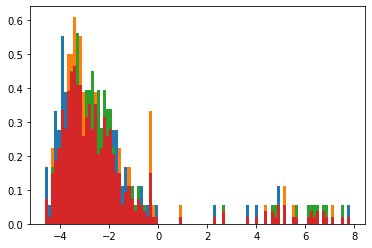

In [32]:
hist = plt.hist(np.log(scores_full1), bins=100, density=True);
plt.hist(np.log(scores_full2), bins=hist[1], density=True);
plt.hist(np.log(scores_full3), bins=hist[1], density=True);
plt.hist(np.log(all_scores), bins=hist[1], density=True);

In [43]:
worse_fit = np.where(all_scores == np.max(all_scores))[0][0]
percentile25 = np.where(all_scores == np.percentile(all_scores, 25, interpolation='nearest'))[0][0]
median = np.where(all_scores == np.median(all_scores))[0][0]
percentile75 = np.where(all_scores == np.percentile(all_scores, 75, interpolation='nearest'))[0][0]
best_fit = np.where(all_scores == np.min(all_scores))[0][0]
fit_indexes = [best_fit, percentile25, median, percentile75, worse_fit]

In [ ]:
[i.fit_split() for i in tqdm(full_models1)]


In [ ]:
[i.fit_split() for i in tqdm(full_models2)]

In [8]:
model = full_models1[0]
np.array(model.pred_test_avg).shape

(100, 32)

In [9]:
np.array(model.X_test_avg).shape

(100, 32)

In [30]:
all_fit_score = [i.fit_score for i in full_models1]
all_fit_scores = [i.fit_scores for i in full_models1]
all_is_fit = [i.is_fit for i in full_models1]
all_loss_val = [i.loss_val for i in full_models1]


-630.6732815015948

In [49]:
import pickle

In [52]:
pickle.dump(full_models1, open('test.pkl', 'wb'), protocol=pickle.DEFAULT_PROTOCOL)

In [55]:
test_in = pickle.Unpickler(open('test.pkl', 'rb')).load()


In [59]:
a = test_in[0]
a.pred_test_avg

array([[13.93751787, 13.43418512, 12.81106172, ..., 11.66589516,
        12.25801616, 12.20991213],
       [13.04833507, 13.50190803, 10.98125529, ..., 11.38018953,
        12.23892536, 13.55131365],
       [13.7017852 , 13.13117914, 11.85293588, ..., 11.58106278,
        11.87983006, 12.2058697 ],
       ...,
       [14.33890301, 13.98129111, 12.18147973, ..., 10.84061855,
        11.05956382, 10.75758315],
       [13.83484164, 14.23119697, 12.42694764, ..., 13.31372648,
        12.99915227, 12.72912044],
       [14.23688055, 13.19184711, 11.44689625, ..., 10.56484456,
        10.93808452, 11.42778348]])

In [48]:
attrs = [i for i in dir(model) if not callable(getattr(model, i)) and '__' not in i]
# for i in dir(model):
#     if not callable(getattr(model, i)):
#         attrs.append(i)
print(attrs)

['X_test_avg', 'X_train_avg', 'fit_score', 'is_fit', 'loss_val', 'opt_out', 'pred_resp', 'pred_test_avg', 'pred_train_avg', 'test_scores', 'train_scores', 'trial_array', 'trial_array_full', 'true_resp', 'unit_id', 'unit_sr', 'unit_sr_flat', 'unit_sr_var', 'unit_srt']


In [31]:
callable(model.loss)

True

In [4]:
full_models1 = pickle.Unpickler(open('221209_full_models1.pkl', 'rb')).load()
full_models2 = pickle.Unpickler(open('221209_full_models2.pkl', 'rb')).load()
full_models3 = pickle.Unpickler(open('221209_full_models3.pkl', 'rb')).load()

cao_models1 = pickle.Unpickler(open('221209_cao_models1.pkl', 'rb')).load()
cao_models2 = pickle.Unpickler(open('221209_cao_models2.pkl', 'rb')).load()
cao_models3 = pickle.Unpickler(open('221209_cao_models3.pkl', 'rb')).load()

conc_models1 = pickle.Unpickler(open('221209_conc_models1.pkl', 'rb')).load()
conc_models2 = pickle.Unpickler(open('221209_conc_models2.pkl', 'rb')).load()
conc_models3 = pickle.Unpickler(open('221209_conc_models3.pkl', 'rb')).load()

onset_models1 = pickle.Unpickler(open('221209_onset_models1.pkl', 'rb')).load()
onset_models2 = pickle.Unpickler(open('221209_onset_models2.pkl', 'rb')).load()
onset_models3 = pickle.Unpickler(open('221209_onset_models3.pkl', 'rb')).load()

In [5]:
full_joint_models = np.concatenate([full_models1, full_models2, full_models3])

In [6]:
test_preds = np.array([np.mean(i.pred_test_avg, axis=0) for i in full_joint_models])
test_true = np.array([np.mean(i.X_test_avg, axis=0) for i in full_joint_models])
all_test_preds = np.array([i.pred_test_avg for i in full_joint_models])
all_test_true = np.array([i.X_test_avg for i in full_joint_models])
all_scores = np.array([np.mean(i.test_scores) for i in full_joint_models])
scores1 = np.array([np.mean(i.test_scores) for i in full_models1])
scores2 = np.array([np.mean(i.test_scores) for i in full_models2])
scores3 = np.array([np.mean(i.test_scores) for i in full_models3])
print(all_scores.shape)

(435,)


In [7]:
combined_scores = [all_scores, scores1, scores2, scores3]

In [8]:
def plot_error_distributions(ax, errors, log=True, yticklabels=None, axvlines=None):
    if log:
        ax.violinplot([np.log10(i) for i in errors], vert=False)
        ax.set_xlabel('Log(Fit error)')
    else:
        ax.violinplot(errors, vert=False)
        ax.set_xlabel('Fit error')
    ax.set_yticks(np.arange(1, len(errors)+1))
    if yticklabels is not None:
        ax.set_yticklabels(yticklabels)
    if axvlines is not None:
        for axvline in axvlines:
            ax.axvline(axvline, linestyle='--', color='k')

In [9]:
worse_fit = np.where(all_scores == np.max(all_scores))[0][0]
percentile25 = np.where(all_scores == np.percentile(all_scores, 25, interpolation='nearest'))[0][0]
median = np.where(all_scores == np.median(all_scores))[0][0]
percentile75 = np.where(all_scores == np.percentile(all_scores, 75, interpolation='nearest'))[0][0]
best_fit = np.where(all_scores == np.min(all_scores))[0][0]
best_fit = np.argsort(all_scores)[0]
fit_indexes = [best_fit, percentile25, median, percentile75, worse_fit]
fit_index_values = [np.log10(all_scores[i]) for i in fit_indexes]

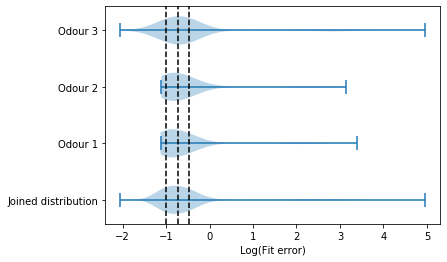

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_error_distributions(ax, combined_scores, yticklabels=['Joined distribution', 'Odour 1', 'Odour 2', 'Odour 3'], axvlines=fit_index_values[1:-1])

In [12]:
print(fit_indexes)
print(fit_index_values)

[346, 71, 65, 422, 311]
[-4.724121916480504, -2.2904913814108236, -1.6454092660295205, -1.1061616338585096, 11.392020984302361]


In [10]:
def plot_fits(fig, gs, true_vals, pred_vals, chosen_indexes, hor=True, legend_ax_index=2):
    if hor:
        subgs = gs.subgridspec(ncols=len(chosen_indexes), nrows=1)
    else:
        subgs = gs.subgridspec(ncols=1, nrows=len(chosen_indexes))
    axs = []
    for ax_i, index in enumerate(chosen_indexes):
        if ax_i != 0:
            
            ax = fig.add_subplot(subgs[ax_i], sharey=axs[-1])
            plt.setp(ax.get_yticklabels(), visible=False)
        else:
            ax = fig.add_subplot(subgs[ax_i])
        ax = plot_fit(ax, true_vals[index], label='True')
        ax = plot_fit(ax, pred_vals[index], label='Prediction')
        axs.append(ax)
        ax.set_xticks(range(32))
        ax.set_xticklabels(glyphs, fontsize=8, rotation=90)
        if ax_i == legend_ax_index:
            ax.legend()
    
    return axs

def plot_fit(ax, vals, label=None):
    mins = np.mean(vals, axis=0) - np.min(vals, axis=0)
    maxs = np.max(vals, axis=0) - np.mean(vals, axis=0)
    
    ax.errorbar(range(32), np.mean(vals, axis=0), yerr=(mins, maxs), fmt='o', label=label, markersize=3, linewidth=1)
    return ax

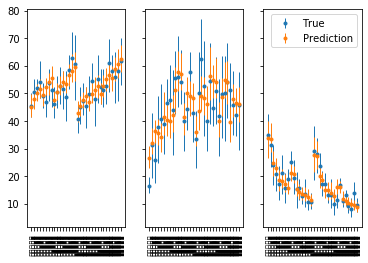

In [11]:
fig = plt.figure()
gs = GridSpec(1, 1)
plot_fits(fig, gs[0], all_test_true, all_test_preds, fit_indexes[1:-1])

In [17]:

combined_trial_scores = np.concatenate([[np.mean(i.test_scores, axis=0) for i in models] for models in [full_models1, full_models2, full_models3]])


In [36]:
print(np.median(np.log10(combined_trial_scores), axis=0).shape)

(32,)


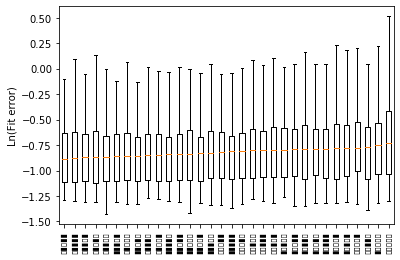

In [45]:
def plot_trial_scores(ax, trial_scores, sort_by_median=True):
    if sort_by_median:
        sorted_index = np.argsort(np.median(np.log10(trial_scores), axis=0))
        sorted_scores = np.log10(trial_scores)[:, sorted_index]
    else:
        sorted_scores = np.log10(trial_scores)
        sorted_index = range(32)
    ax.boxplot(sorted_scores, showfliers=False)
    ax.set_xticks(range(1, 33))
    ax.set_xticklabels(np.array(glyphs)[sorted_index], rotation=90, fontsize=8)
    ax.set_ylabel('Ln(Fit error)')
fig = plt.figure()
ax = fig.add_subplot(111)
plot_trial_scores(ax, combined_trial_scores, sort_by_median=True)

#Change to a conc vs onset scatter plot

In [12]:
all_reses = np.load('../Fig2/221027_all_svm_outs.npy')
preds1 = np.array(all_reses)[0, :, 0].reshape(500, 32)
trues1 = np.array(all_reses)[0, :, 1].reshape(500, 32)
preds2 = np.array(all_reses)[1, :, 0].reshape(500, 32)
trues2 = np.array(all_reses)[1, :, 1].reshape(500, 32)
preds3 = np.array(all_reses)[2, :, 0].reshape(500, 32)
trues3 = np.array(all_reses)[2, :, 1].reshape(500, 32)
cm1 = confusion_matrix(np.concatenate(trues1), np.concatenate(preds1), normalize='true', labels=range(32))
cm2 = confusion_matrix(np.concatenate(trues2), np.concatenate(preds2), normalize='true', labels=range(32))
cm3 = confusion_matrix(np.concatenate(trues3), np.concatenate(preds3), normalize='true', labels=range(32))

In [13]:
def plot_loglog_error(ax, scores_conc, scores_onset, lims='equal', label=None):
    ax.loglog(scores_conc, scores_onset, '.', label=label)
#     ax.set_xlabel('Log concentration error (a.u.)')
#     ax.set_ylabel('Log onset error (a.u.)')
    if lims == 'equal':
        max_lim = np.max([ax.get_ylim(), ax.get_xlim()])
        min_lim = np.min([ax.get_ylim(), ax.get_xlim()])
        ax.set_ylim(min_lim, max_lim)
        ax.set_xlim(min_lim, max_lim)
def plot_two_errors(fig, gs, all_scores1, all_scores2, all_scores3, all_scores4, lims='equal', label=None, orientation='h'):
    if orientation == 'h':
        sub_gs = gs.subgridspec(ncols=2, nrows=1, wspace=0.5)
    elif orientation == 'v':
        sub_gs = gs.subgridspec(ncols=1, nrows=2, wspace=0.5)
    error_ax1 = fig.add_subplot(sub_gs[0], aspect=1)
    error_ax2 = fig.add_subplot(sub_gs[1], aspect=1)
    for i in range(len(all_scores_conc)):
        plot_loglog_error(error_ax1, all_scores1[i], all_scores2[i], label=f'Odour {i+1}')
        plot_loglog_error(error_ax2, all_scores3[i], all_scores4[i])
    max_lim = np.max([error_ax1.get_ylim(), error_ax2.get_xlim()])
    min_lim = np.min([error_ax1.get_ylim(), error_ax2.get_xlim()])
    error_ax1.set_ylim(min_lim, max_lim)
    error_ax1.set_xlim(min_lim, max_lim)
    error_ax2.set_ylim(min_lim, max_lim)
    error_ax2.set_xlim(min_lim, max_lim)
    return error_ax1, error_ax2

In [14]:
test_scores_conc1 = [np.mean(i.test_scores) for i in conc_models1]
test_scores_conc2 = [np.mean(i.test_scores) for i in conc_models2]
test_scores_conc3 = [np.mean(i.test_scores) for i in conc_models3]

test_scores_cao1 = [np.mean(i.test_scores) for i in cao_models1]
test_scores_cao2 = [np.mean(i.test_scores) for i in cao_models2]
test_scores_cao3 = [np.mean(i.test_scores) for i in cao_models3]

test_scores_onset1 = [np.mean(i.test_scores) for i in onset_models1]
test_scores_onset2 = [np.mean(i.test_scores) for i in onset_models2]
test_scores_onset3 = [np.mean(i.test_scores) for i in onset_models3]

test_scores1 = [np.mean(i.test_scores) for i in full_models1]
test_scores2 = [np.mean(i.test_scores) for i in full_models2]
test_scores3 = [np.mean(i.test_scores) for i in full_models3]

all_scores_conc = [test_scores_conc1, test_scores_conc2, test_scores_conc3]
all_scores_onset = [test_scores_onset1, test_scores_onset2, test_scores_onset3]
all_scores_cao = [test_scores_cao1, test_scores_cao2, test_scores_cao3]
all_scores_full = [test_scores1, test_scores2, test_scores3]


Text(0, 0.5, 'Log temporal bin error (a.u.)')

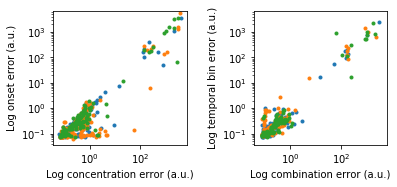

In [22]:
fig = plt.figure()
gs = GridSpec(1, 1)
ea1, ea2 = plot_two_errors(fig, gs[0], all_scores_conc, all_scores_onset, all_scores_cao, all_scores_full, orientation='h')
ea1.set_xlabel('Log concentration error (a.u.)')
ea1.set_ylabel('Log onset error (a.u.)')
ea2.set_xlabel('Log combination error (a.u.)')
ea2.set_ylabel('Log temporal bin error (a.u.)')

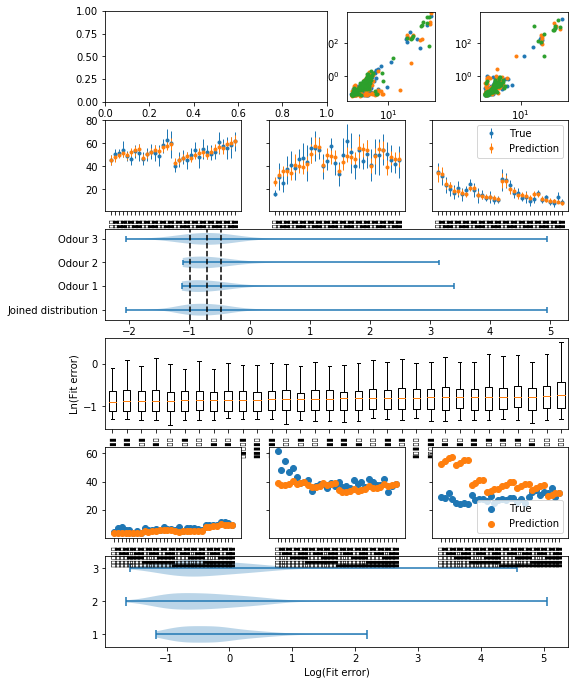

In [58]:
fig = plt.figure(figsize=(8.3, 11.7))
gs = GridSpec(6, 4)
ea1, ea2 = plot_two_errors(fig, gs[0, 2:], all_scores_conc, all_scores_onset, all_scores_cao, all_scores_full, orientation='h')
diagram_ax = fig.add_subplot(gs[0, :-2])
plot_axes = plot_fits(fig, gs[1, :], all_test_true, all_test_preds, fit_indexes[1:-1])
dist_ax = fig.add_subplot(gs[2, :])
plot_error_distributions(dist_ax, combined_scores, yticklabels=['Joined distribution', 'Odour 1', 'Odour 2', 'Odour 3'], axvlines=fit_index_values[1:-1])
trial_error_ax = fig.add_subplot(gs[3, :])
plot_trial_scores(trial_error_ax, combined_trial_scores)
other_odour_pred_ax = fig.add_subplot(gs[5, :])
plot_error_distributions(other_odour_pred_ax, [pred_scores1, pred_scores2, pred_scores3])
#pred_odour_ax = fig.add_subplot(gs[4, :])
plot_pred_odour(fig, gs[4, :], all_pred_models_true, all_pred_models_pred, fit_indexes_pred_odour[1:-1])
# heatmap_ax = fig.add_subplot(gs[1, :])
# vmax = np.max(np.abs(firing_difference1))
# link = linkage(np.array(firing_difference1), method='complete', optimal_ordering=True)
# dend = dendrogram(link, no_plot=True)
# im = heatmap_ax.imshow(np.array(firing_difference1)[dend['leaves']].T, cmap='bwr', vmax=vmax, vmin=-vmax)
# divider = make_axes_locatable(heatmap_ax)
# cax = divider.append_axes("right", size='2%', pad=0.05)
# plt.colorbar(im, cax=cax)
#plt.colorbar()

In [35]:
combined_trial_scores.shape

(435, 32)

In [29]:
def plot_pred_odour(fig, gs, true_vals, pred_vals, chosen_indexes, legend_ax_index=2):

    subgs = gs.subgridspec(ncols=len(chosen_indexes), nrows=1)
    axs = []
    for ax_i, index in enumerate(chosen_indexes):
        if ax_i != 0:
            
            ax = fig.add_subplot(subgs[ax_i], sharey=axs[-1])
            plt.setp(ax.get_yticklabels(), visible=False)
        else:
            ax = fig.add_subplot(subgs[ax_i])
        ax.scatter(range(32), true_vals[index], label='True')
        ax.scatter(range(32), pred_vals[index], label='Prediction')
        axs.append(ax)
        ax.set_xticks(range(32))
        ax.set_xticklabels(glyphs, fontsize=8, rotation=90)
        if ax_i == legend_ax_index:
            ax.legend()
    
    return axs

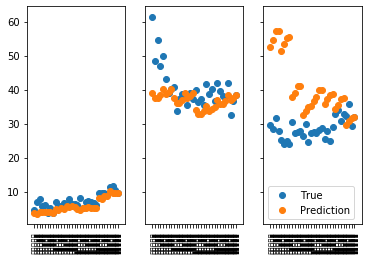

In [59]:
fig = plt.figure()
gs = GridSpec(1, 1)
plot_pred_odour(fig, gs[0], all_pred_models_true, all_pred_models_pred, fit_indexes_pred_odour[1:-1])

In [49]:
print(len(pred_models_true1))

130


In [53]:
def pred_other_odour(model1, model2, model3, unit_usrt, ui, pred_trial = -1, ratio_schema = 'pred_trial', include_t=False):
    full_array = em.trial_arrays['diff_array']
    if ratio_schema == 'pred_trial':
        ratio_w1 = model1.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
        ratio_w2 = model2.true_resp[-1]/((model1.true_resp[-1]+model2.true_resp[-1]))
    elif ratio_schema == 'mean':
        ratio_w1 = np.mean(model1.true_resp)/((np.mean(model1.true_resp)+np.mean(model2.true_resp)))
        ratio_w2 = np.mean(model2.true_resp)/((np.mean(model1.true_resp)+np.mean(model2.true_resp)))
    elif ratio_schema == 'max':
        if model1.true_resp[-1] > model2.true_resp[-1]:
            ratio_w1 = 1
            ratio_w2 = 0
        else:
            ratio_w1 = 0
            ratio_w2 = 1
    if not include_t:
        pred_ws = model1.opt_out.x[:-1]*ratio_w1 + model2.opt_out.x[:-1]*ratio_w2
        avg_thresh = (model1.opt_out.x[-1] + model2.opt_out.x[-1])/2
        pred_out = pred_ws @ full_array[pred_trial]
        scale = (np.log(model3.true_resp[pred_trial]) - avg_thresh)/pred_out
        pred_ws = scale*pred_ws
        pred_ws = list(pred_ws) + [avg_thresh]
    else:
        pred_ws = model1.opt_out.x*ratio_w1 + model2.opt_out.x*ratio_w2
        full_array_1 = np.append(full_array, np.ones((32, 1)), axis=1)
        pred_out = pred_ws @ full_array_1[pred_trial]
        scale = (np.log(model3.true_resp[pred_trial]))/pred_out
        pred_ws = scale*pred_ws
    model_test = em.ExponentialCustomTrialArray(unit_usrt, ui, full_array)
    model_test.fit(W=pred_ws)
    return model_test

In [55]:
pred_scores1 = []
pred_scores2 = []
pred_scores3 = []

pred_models1 = []
pred_models2 = []
pred_models3 = []
for ui in tqdm(good_indexes, position=0, leave=False):
    model_test = pred_other_odour(full_models2[ui], full_models3[ui], full_models1[ui], unit_usrt1, ui, include_t=True)
    pred_scores1.append(model_test.fit_score)
    pred_models1.append(model_test)
    model_test = pred_other_odour(full_models1[ui], full_models3[ui], full_models2[ui], unit_usrt2, ui, include_t=True)
    pred_scores2.append(model_test.fit_score)
    pred_models2.append(model_test)
    model_test = pred_other_odour(full_models2[ui], full_models1[ui], full_models3[ui], unit_usrt3, ui, include_t=True)
    pred_scores3.append(model_test.fit_score)
    pred_models3.append(model_test)

In [56]:
pred_models_pred1 = [i.pred_resp for i in pred_models1]
pred_models_pred2 = [i.pred_resp for i in pred_models2]
pred_models_pred3 = [i.pred_resp for i in pred_models3]

pred_models_true1 = [i.true_resp for i in pred_models1]
pred_models_true2 = [i.true_resp for i in pred_models2]
pred_models_true3 = [i.true_resp for i in pred_models3]

all_pred_models_pred = np.concatenate([pred_models_pred1, pred_models_pred2, pred_models_pred3])
all_pred_models_true = np.concatenate([pred_models_true1, pred_models_true2, pred_models_true3])

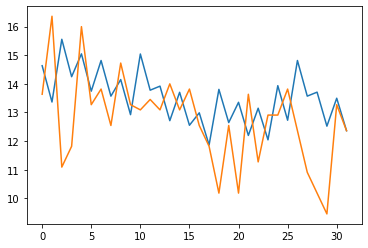

In [57]:
plt.plot(pred_models1[0].pred_resp)
plt.plot(pred_models1[0].true_resp)

In [37]:
print(len(pred_models_true1[0]))
print(len(pred_models_pred1[0]))

32
32


ValueError: The lengths of the data (1) and the error 2 do not match

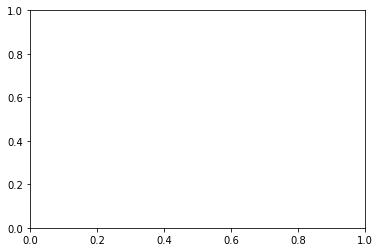

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_fit(ax, pred_models_pred1[0], pred_models_true1[0])

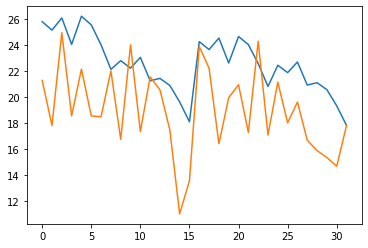

In [42]:
plt.plot(pred_models_pred1[fit_indexes[1]])
plt.plot(pred_models_true1[fit_indexes[1]])

ValueError: The lengths of the data (1) and the error 2 do not match

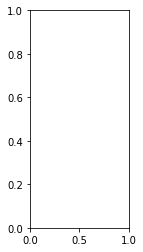

In [32]:
fig = plt.figure()
gs = GridSpec(1, 1)
plot_axes = plot_fits(fig, gs[0], pred_models_true1, pred_models_pred1, fit_indexes[1:-1])

In [32]:
all_pred_scores = np.concatenate([pred_scores1, pred_scores2, pred_scores3])

In [33]:
worse_fit = np.where(all_pred_scores == np.max(all_pred_scores))[0][0]
percentile25 = np.where(all_pred_scores == np.percentile(all_pred_scores, 25, interpolation='nearest'))[0][0]
median = np.where(all_pred_scores == np.percentile(all_pred_scores, 50, interpolation='nearest'))[0][0]
percentile75 = np.where(all_pred_scores == np.percentile(all_pred_scores, 75, interpolation='nearest'))[0][0]
best_fit = np.where(all_pred_scores == np.min(all_pred_scores))[0][0]
best_fit = np.argsort(all_pred_scores)[0]
fit_indexes_pred_odour = [best_fit, percentile25, median, percentile75, worse_fit]
fit_index_values_pred_odour = [np.log(all_pred_scores[i]) for i in fit_indexes_pred_odour]

In [29]:
print(np.where(all_pred_scores == np.median(all_pred_scores)))
print(np.median(all_pred_scores, ))
print(np.percentile(all_pred_scores, 50, interpolation='nearest'))

(array([], dtype=int64),)
0.424203811427461
0.4231304895157295


In [50]:
ui = 30
model_test = pred_other_odour(full_models1[ui], full_models2[ui], full_models3[ui], unit_usrt3, ui, include_t=True)

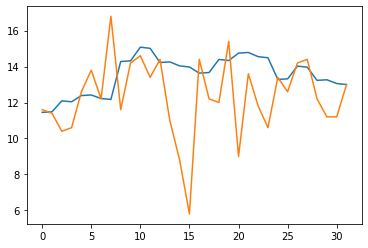

In [51]:
plt.plot(model_test.pred_resp)
plt.plot(model_test.true_resp)

In [71]:
include_t_scores = []
exclude_t_scores = []
for ui in tqdm(good_indexes, position=0, leave=False):
    model_test = pred_other_odour(full_models2[ui], full_models1[ui], full_models3[ui], unit_usrt3, ui, include_t=True)
    include_t_scores.append(model_test.fit_score)
    model_test = pred_other_odour(full_models2[ui], full_models1[ui], full_models3[ui], unit_usrt3, ui, include_t=False)
    exclude_t_scores.append(model_test.fit_score)
    

In [66]:
print(good_indexes)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  18  22
  23  24  25  26  27  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  55  57  58  59  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  84
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144]


{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff62fb9ecc0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff62fbafe48>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff62fb3b668>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff62fb3b860>}

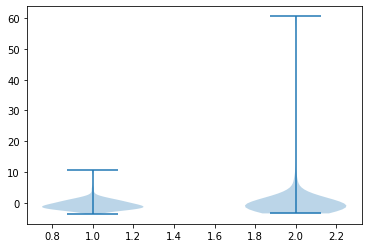

In [72]:
plt.violinplot([np.log(include_t_scores), np.log(exclude_t_scores)])

In [64]:
print(include_t_scores)

[0.17540760236632225, 0.24080763349446632, 0.1451527442561022, 0.7040636799852482, 0.17433909487541405, 0.08485400678051039, 0.2641464974326948, 0.21028979539426537, 0.15796686805973742, 0.2305438727400544, 0.18107802581490412, 0.6598398939022966, 0.1324762330530644, 0.11258788290012875, 0.5114238263095194, 0.21301510895397857, nan, 0.02829140644728327, 0.12269977269725071, nan, nan, 1.366505300989684, 0.21787228111150475, 0.9005457735752609, 0.12362985528018468, 0.09270635300122092, 0.8873968150441296, 0.08900999204070362, 0.11782582006521915, nan, 0.5972383386095943, 0.08568484716440328, 0.06821561180752163, 0.22375958957480363, 0.14470653042987877, 0.31198591774873724, 0.461007942237369, 0.7189013272213785, 1.907227411167164, 7.8962507890905185, 0.23490780993790522, 0.48612279577600354, 0.2833804306798993, 4.821114381067396, 9.848981557884214, 0.5229353818215514, 5.0614095421618135, 71.66244651775393, 0.7545854128690758, 2.241457107465708, 0.7490465525565464, 0.5146789693652514, 0.2

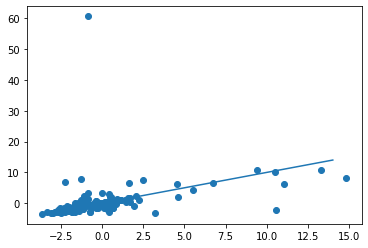

In [56]:
plt.scatter(np.log(include_t_scores), np.log(exclude_t_scores))
plt.plot(range(15))

In [58]:
print(len(np.where(np.log(include_t_scores) < np.log(exclude_t_scores))[0]))

68


/camp/home/warnert/.conda/envs/blip_manu/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [ ]:
plt.loglog([np.mean(i.test_scores) for i in cao_models1], [np.mean(i.test_scores) for i in full_models1], '.')

In [ ]:
trial_array_full = np.concatenate([[list(cao_models1[0].trial_array[s])]*len(cao_models1[0].unit_sr[s]) for s in range(len(cao_models1[0].trial_array))])
print(trial_array_full)

In [ ]:
plt.imshow(cao_models1[10].test_scores - full_models1[10].test_scores)
plt.colorbar()

In [ ]:
full_scores1 = np.array([i.test_scores for i in full_models1])
full_scores2 = np.array([i.test_scores for i in full_models2])
full_scores3 = np.array([i.test_scores for i in full_models3])

cao_scores1 = np.array([i.test_scores for i in cao_models1])
cao_scores2 = np.array([i.test_scores for i in cao_models2])
cao_scores3 = np.array([i.test_scores for i in cao_models3])

In [ ]:
print(len(np.where(full_scores1.reshape(145, -1).mean(axis=-1) < 1)[0]))
print(len(np.where(cao_scores1.reshape(145, -1).mean(axis=-1) < 1)[0]))
print(len(np.where(full_scores2.reshape(145, -1).mean(axis=-1) < 1)[0]))
print(len(np.where(cao_scores2.reshape(145, -1).mean(axis=-1) < 1)[0]))
print(len(np.where(full_scores3.reshape(145, -1).mean(axis=-1) < 1)[0]))
print(len(np.where(cao_scores3.reshape(145, -1).mean(axis=-1) < 1)[0]))

In [ ]:
plt.semilogy([np.mean(i.test_scores) for i in cao_models1])
plt.semilogy([np.mean(i.test_scores) for i in full_models1])


In [ ]:
good_indexes = ba.get_stable_resp_indexes()

In [ ]:
plt.semilogy(np.array([np.mean(i.test_scores) for i in cao_models1])[good_indexes])
plt.semilogy(np.array([np.mean(i.test_scores) for i in full_models1])[good_indexes])


In [ ]:
plt.semilogy(np.array([np.mean(i.train_scores) for i in cao_models1])[good_indexes])
plt.semilogy(np.array([np.mean(i.train_scores) for i in full_models1])[good_indexes])


In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 3))
ax[1].semilogy(np.array([np.mean(i.test_scores) for i in cao_models1])[good_indexes], label='Cao')
ax[1].semilogy(np.array([np.mean(i.test_scores) for i in full_models1])[good_indexes], label='Full')
ax[1].legend()
ax[0].semilogy(np.array([np.mean(i.train_scores) for i in cao_models1])[good_indexes])
ax[0].semilogy(np.array([np.mean(i.train_scores) for i in full_models1])[good_indexes])
fig.add_subplot(111, frameon=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Units', labelpad=15)
plt.ylabel('Ln(Error)', labelpad=30)
ax[0].set_title('Training scores')
ax[1].set_title('Test scores')

In [ ]:
all_fit_scores = []
for i in trange(145, leave=False, position=0):
    model = deepcopy(full_models1[i])
    #print(model.trial_array)

    #plt.plot(model.pred_resp)
    model.fit()
    pre_fits = model.fit_scores()
    fit_scores = []
    for i in range(32):
        pre_fit = pre_fits[i]
        witheld_array = np.arange(32)
        witheld_array = witheld_array[witheld_array != i]
        full_var = model.unit_sr_var
        sub_var = full_var[witheld_array]
        model.unit_sr_var = sub_var
        #print(witheld_array)
        sub_true = np.array(model.true_resp)[witheld_array]
        sub_full_array = full_array[witheld_array]
        model.fit(X=sub_true, y=sub_full_array, update_loss=False)
        model.unit_sr_var = full_var
        ws = model.opt_out.x
        model.fit(W=ws)
        #print(model.fit_score)
        #plt.plot(model.pred_resp)
        fit_scores.append(model.fit_scores()[i]/pre_fit)
    all_fit_scores.append(fit_scores)

In [133]:
def witheld_trial_pred_error(models):
    all_fit_scores = []
    for i in trange(len(models), leave=False, position=0):
        model = deepcopy(models[i])
        model.fit()
        pre_fits = model.fit_scores()
        fit_scores = []
        for i in range(32):
            pre_fit = pre_fits[i]
            witheld_array = np.arange(32)
            witheld_array = witheld_array[witheld_array != i]
            full_var = model.unit_sr_var
            sub_var = full_var[witheld_array]
            model.unit_sr_var = sub_var
            #print(witheld_array)
            sub_true = np.array(model.true_resp)[witheld_array]
            sub_full_array = full_array[witheld_array]
            model.fit(X=sub_true, y=sub_full_array, update_loss=False)
            model.unit_sr_var = full_var
            ws = model.opt_out.x
            model.fit(W=ws)
            #print(model.fit_score)
            #plt.plot(model.pred_resp)
            fit_scores.append(model.fit_scores()[i]/pre_fit)
        all_fit_scores.append(fit_scores)
    return all_fit_scores

In [134]:
all_fit_errors1 = witheld_trial_pred_error(full_models1)

In [135]:
all_fit_errors2 = witheld_trial_pred_error(full_models2)
all_fit_errors3 = witheld_trial_pred_error(full_models3)

In [ ]:
all_drop_scores = []
for i in trange(145, leave=False, position=0):
    model = deepcopy(full_models1[i])
    
    model.fit()
    pre_fit = model.fit_score
    trial_fit_scores = []
    for i in range(1, 32):
        fit_scores = []
        for j in range(100):
            witheld_trials = np.random.choice(range(32), size=i, replace=False)
            other_trials = np.arange(32)
            other_trials = np.delete(other_trials, witheld_trials)
            
            full_var = model.unit_sr_var
            sub_var = full_var[other_trials]
            model.unit_sr_var = sub_var
            #print(witheld_array)
            sub_true = np.array(model.true_resp)[other_trials]
            sub_full_array = full_array[other_trials]
            model.fit(X=sub_true, y=sub_full_array, update_loss=False)
            model.unit_sr_var = full_var
            ws = model.opt_out.x
            model.fit(W=ws)
            #print(model.fit_score)
            #plt.plot(model.pred_resp)
            fit_scores.append(model.fit_score)
        trial_fit_scores.append(fit_scores/pre_fit)
    all_drop_scores.append(trial_fit_scores)

In [ ]:
np.random.seed(10)
witheld_trials = np.random.choice(range(32), size=2, replace=False)
other_trials = np.arange(32)
other_trials = np.delete(other_trials, witheld_trials)
print(other_trials)

(145,)


In [ ]:
print(model.fit_scores())

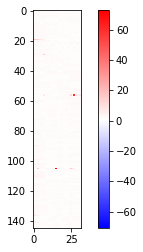

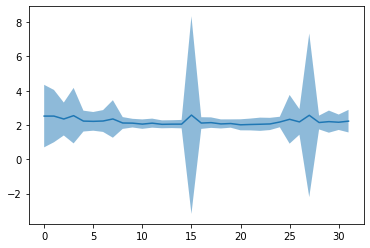

In [122]:
plt.imshow(np.array(all_fit_scores), cmap='bwr', vmin=1+np.max(all_fit_scores), vmax=-np.max(all_fit_scores) + 1)
plt.colorbar()
plt.figure()
stds = np.std(all_fit_scores, axis=0)
mins = np.mean(all_fit_scores, axis=0) - stds
maxs = np.mean(all_fit_scores, axis=0) + stds
plt.plot(np.mean(all_fit_scores, axis=0))
plt.fill_between(np.arange(32), mins, maxs, alpha=0.5)

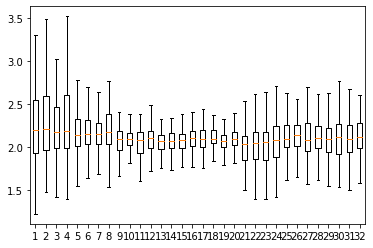

In [123]:
plt.boxplot(np.array(all_fit_scores), showfliers=False);


In [ ]:
print(np.array(all_fit_scores).shape)

In [ ]:
client.close()

In [ ]:
sig_better = 0
sig_worse = 0
for i in good_indexes:
    significance = ttest_ind(np.mean(cao_models1[i].test_scores, axis=-1), np.mean(full_models1[i].test_scores, axis=-1))[1]
    if np.mean(cao_models1[i].test_scores) > np.mean(full_models1[i].test_scores):
        if significance < 0.05:
            sig_better += 1
    else:
        if significance < 0.05:
            sig_worse += 1

In [ ]:
print(sig_better, sig_worse)

In [ ]:
full_tests1 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in full_models1])
full_tests2 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in full_models2])
full_tests3 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in full_models3])

cao_tests1 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in cao_models1])
cao_tests2 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in cao_models2])
cao_tests3 = np.array([(1 - i.test_scores*i.unit_sr_var)/i.unit_sr_var for i in cao_models3])

In [ ]:
plt.scatter(np.mean(cao_tests1.reshape(145, -1), axis=-1), np.mean(full_tests1.reshape(145, -1), axis=-1))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10])

In [ ]:
print(cao_tests1[0])
print('a')
print(full_tests1[0])

In [ ]:
def fit_split(model, n_splits=100, test_size=0.5, train_test_var=False, random_state=None, sss=None):
        '''
        Fit portions of the data and compare fitted values across different splits
        '''
        if sss is None:
            sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
        trial_labels =  np.concatenate([[s for j in range(len(model.unit_sr[s]))] for s in range(len(model.trial_array))])
        all_train_scores = []
        all_test_scores = []
        for train_index, test_index in sss.split(model.unit_sr_flat, trial_labels):
            X_train = model.unit_sr_flat[train_index]
            X_test = model.unit_sr_flat[test_index]
            y_train = model.trial_array_full[train_index]
            y_test = model.trial_array_full[test_index]
            labels_train = trial_labels[train_index]
            labels_test = trial_labels[test_index]
            print(X_train)
            print(X_train.shape, y_train.shape)
            return X_train, y_train
            model.fit(X_train, y_train)
            out_train, pred_train = self.opt_out, self.pred_resp
            model.fit(X_test, y_test, W=out_train.x)
            pred_test =self.pred_resp

            X_train_avg = []
            X_test_avg = []
            pred_train_avg = []
            pred_test_avg = []
            train_unit_var = []
            test_unit_var = []

            for label in range(len(self.trial_array)):
                X_train_avg.append(np.mean(X_train[labels_train == label]))
                X_test_avg.append(np.mean(X_test[labels_test == label]))

                pred_train_avg.append(np.mean(pred_train[labels_train == label]))
                pred_test_avg.append(np.mean(pred_test[labels_test == label]))

                train_unit_var.append(np.std(X_train[labels_train==label])**2)
                test_unit_var.append(np.std(X_test[labels_test==label])**2)
            
            train_scores = np.array([np.power((i-j), 2) for i, j in zip(X_train_avg, pred_train_avg)])
            test_scores = np.array([np.power((i-j), 2) for i, j in zip(X_test_avg, pred_test_avg)])
            if train_test_var:
                all_train_scores.append(1-np.array(train_scores)/np.array(train_unit_var))
                all_test_scores.append(1-np.array(test_scores)/np.array(test_unit_var))
            
            else:
                all_train_scores.append(1-np.array(train_scores)/self.unit_sr_var)
                all_test_scores.append(1-np.array(test_scores)/self.unit_sr_var)
        return train_scores, test_scores

In [ ]:
X_train, y_train = fit_split(model)

In [ ]:
print(y_train)

In [ ]:
plt.plot(full_models1[dend])

In [ ]:
print(full_models1[140].true_resp)
print(full_models1[140].pred_resp)

In [ ]:
plt.plot(np.array(firing_difference3)[:, 0])

In [ ]:
link = linkage(np.array(firing_difference1), method='complete', optimal_ordering=True)
dend = dendrogram(link)

In [ ]:
link = linkage(np.array(firing_difference2), method='complete', optimal_ordering=True)
dend = dendrogram(link)

In [ ]:
firing_difference_conc = np.concatenate([firing_difference1, firing_difference2, firing_difference3], axis=0)

In [ ]:
link = linkage(np.array(firing_difference_conc), method='complete', optimal_ordering=True)
dend = dendrogram(link)

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
dend = dendrogram(link, ax=ax)

In [ ]:
dend['leaves']

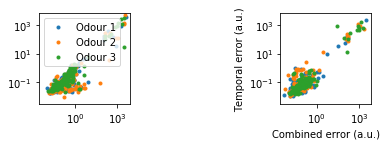

In [97]:
fig = plt.figure(figsize=(8.3, 11.7))
gs = GridSpec(4, 4, hspace=1)
error_ax = fig.add_subplot(gs[0, :2], aspect=1)
plot_loglog_error(error_ax, scores1_conc, scores1_onset, label='Odour 1')
plot_loglog_error(error_ax, scores2_conc, scores2_onset, label='Odour 2')
plot_loglog_error(error_ax, scores3_conc, scores3_onset, label='Odour 3')
error_ax.legend()

error_ax2 = fig.add_subplot(gs[0, 2:], aspect=1)
plot_loglog_error(error_ax2, scores_cao1, scores_full1)
plot_loglog_error(error_ax2, scores_cao2, scores_full2)
plot_loglog_error(error_ax2, scores_cao3, scores_full3)
error_ax2.set_xlabel('Combined error (a.u.)')
error_ax2.set_ylabel('Temporal error (a.u.)')

max_lim = np.max([error_ax.get_ylim(), error_ax2.get_xlim()])
min_lim = np.min([error_ax.get_ylim(), error_ax2.get_xlim()])
error_ax.set_ylim(min_lim, max_lim)
error_ax.set_xlim(min_lim, max_lim)
error_ax2.set_ylim(min_lim, max_lim)
error_ax2.set_xlim(min_lim, max_lim)

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 
error_ax.xaxis.set_minor_locator(locmin)
error_ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# loss_ax = fig.add_subplot(gs[0, 1])
# loss_ax.plot([np.mean(loses), loss_random, np.mean([loss_onset1, loss_onset2, loss_onset3]), np.mean([loss_conc1, loss_conc2, loss_conc3])], '.')
# loss_ax.set_xticks(range(4))
# loss_ax.set_xticklabels(["Inter-odour", 'Shuffle', 'Onset', 'Concentration'])
# loss_ax.set_ylabel('Confusion matrix error')
# loss_ax.set_xlabel('Filter types')

In [ ]:
xs = [0.75, 1.25, 2.75, 3.25, 4.75, 5.25]
plt.boxplot([np.log10(scores_cao1), np.log10(scores_full1), np.log10(scores_cao2), np.log10(scores_full2), np.log10(scores_cao3), np.log10(scores_full3)], showfliers=False, positions=xs, widths=0.5);
plt.ylabel('Log$_{10}$(normalised error)')

In [ ]:
ttest_ind(scores_cao1, scores_full1, equal_var=False)

In [ ]:
def generate_modelled_responses(firing_rates, input_noise_level=0.0, output_noise_level=0.0, repeat_num=15):
    modelled_resps = np.array([[[poisson(abs(i * (1 + input_noise_level*norm.rvs(1)))).rvs(1)[0]*(1 + output_noise_level*norm.rvs(1)) for j in range(repeat_num)] for i in cell] for cell in tqdm(firing_rates, leave=False, position=0)])
    modelled_resps = modelled_resps.reshape(130, -1)
    ys = [i for i in range(32) for j in range(repeat_num)]
    return modelled_resps, ys

def fit_modelled_svc(modelled_responses, ys, test_size=None, rep_count = 100):
    trues = []
    preds = []
    scores = []
    for i in trange(rep_count, position=0, leave=False):
        X_train, X_test, y_train, y_test = train_test_split(modelled_responses.T, ys)
        svc = LinearSVC(max_iter=10000)
        svc.fit(X_train, y_train)
        trues.append(y_test)
        preds.append(svc.predict(X_test))
        scores.append(svc.score(X_test, y_test))
    return np.array(trues), np.array(preds), np.array(scores)

def dask_generate_and_fit(firing_rates_scattered, input_noise_level=0.0, output_noise_level=0.0, repeat_num=15, rep_count=100):
    modelled_resps, ys = generate_modelled_responses(firing_rates_scattered, input_noise_level, output_noise_level, repeat_num)
    trues, preds, scores = fit_modelled_svc(modelled_resps, ys, rep_count=rep_count)
    return trues, preds, scores, (input_noise_level, output_noise_level)

In [ ]:
trues, preds, scores, noises = dask_generate_and_fit(np.array(preds_onset1)[good_indexes], rep_count=10)

In [ ]:
print(noises)

In [ ]:
preds_onset1_scattered = client.scatter(np.array(preds_onset1)[good_indexes])
preds_onset2_scattered = client.scatter(np.array(preds_onset2)[good_indexes])
preds_onset3_scattered = client.scatter(np.array(preds_onset3)[good_indexes])
preds_conc1_scattered = client.scatter(np.array(preds_conc1)[good_indexes])
preds_conc2_scattered = client.scatter(np.array(preds_conc2)[good_indexes])
preds_conc3_scattered = client.scatter(np.array(preds_conc3)[good_indexes])

In [ ]:
noise_levels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [ ]:

dask_futures = list(np.concatenate([[dask.delayed(dask_generate_and_fit)(preds_conc1_scattered, i, j) for i in noise_levels] for j in noise_levels]))

In [ ]:
repeats=list(np.arange(100))

In [ ]:

dask_outs = client.map(dask_generate_and_fit, [preds_conc1_scattered], noise_levels, noise_levels)

In [ ]:
dask_outs = client.compute(dask_futures)

In [ ]:
dasked.current_futures = dask_outs

In [ ]:
client.cancel(dask_outs)

In [ ]:
combos, dask_outs = dasked.gridsearch(dask_generate_and_fit, [preds_conc3_scattered], noise_levels, noise_levels)

In [ ]:
dasked.check_progress()

In [ ]:
client.close()

In [ ]:
client.cancel(dask_outs)

In [ ]:
res_conc3 = [i.result() for i in dask_outs]

In [ ]:
res_onset1 = res_onset

In [ ]:
res_conc1 = res

In [ ]:
res_onset1 = np.array(res_onset1)
scores_onset1 = res_onset1[:, 2]
scores_onset1 = np.concatenate(scores_onset1).reshape(11, 11, 100)
cms = np.array([confusion_matrix(np.concatenate(res_onset1[i, 0]), np.concatenate(res_onset1[i, 1]), normalize='true', labels=list(range(32))) for i in range(121)])
loss = np.array([fit_loss(cm1, i) for i in cms]).reshape(11, 11)
loss_random = fit_loss(cm1, cm_random)

In [ ]:
def best_cm(res, true_cm):
    cms = np.array([confusion_matrix(np.concatenate(res[i, 0]), np.concatenate(res[i, 1]), normalize='true', labels=list(range(32))) for i in range(121)])
    loss = np.array([fit_loss(true_cm, i) for i in cms])
    best_fit = np.argmin(loss)
    return cms[best_fit], np.min(loss)

In [ ]:
cm_onset1, loss_onset1 = best_cm(res_onset1, cm1)
cm_onset2, loss_onset2 = best_cm(np.array(res_onset2), np.array(cm2))
cm_onset3, loss_onset3 = best_cm(np.array(res_onset3), cm3)
cm_conc1, loss_conc1 = best_cm(np.array(res_conc1), cm1)
cm_conc2, loss_conc2 = best_cm(np.array(res_conc2), cm2)
cm_conc3, loss_conc3 = best_cm(np.array(res_conc3), cm3)

In [ ]:
loses = []
for indexi, i in enumerate([cm1, cm2, cm3]):
    for indexj, j in enumerate([cm1, cm2, cm3]):
        if indexi != indexj:
            loses.append(fit_loss(cm1, cm2))


In [ ]:
plt.plot([np.mean(loses), loss_random, loss_onset1, loss_onset2, loss_onset3, loss_conc1, loss_conc2, loss_conc3, ], '.')

In [ ]:
max_diff = np.max([np.max(loss) - loss_random, loss_random - np.min(loss)])

plt.imshow(loss, vmin=loss_random-max_diff, vmax=loss_random+max_diff, cmap='bwr')
plt.colorbar()
print(loss_random)

In [ ]:
print(np.where(loss ==np.min(loss)))

In [ ]:
plt.imshow(cms.reshape(11, 11, 32, 32)[0, 9])

In [ ]:
plt.imshow(scores.mean(axis=-1))
plt.colorbar()

In [ ]:
def fit_loss(cm_true, cm_modelled):
    loss = np.sqrt(np.sum((cm_true.ravel()-cm_modelled.ravel())**2))
    return loss

In [ ]:
noise_levels = np.arange(0, 1.1, 0.1)
all_scores = []
for input_noise in noise_levels:
    for output_noise in noise_levels:
        modelled_resps, ys = generate_modelled_responses(np.array(preds_onset1)[good_indexes], input_noise_level=input_noise, output_noise_level=output_noise)
        trues, preds, scores = fit_modelled_svc(modelled_resps, ys)
        

In [ ]:
model_onset1 = generate_modelled_responses(np.array(preds_onset1)[good_indexes], input_noise_level=0.0)

In [ ]:
trues, preds, scores = fit_modelled_svc(model_onset1[0], model_onset1[1])

In [ ]:
cm = confusion_matrix(np.concatenate(trues), np.concatenate(preds), normalize='true')

In [ ]:
plt.imshow(cm)
plt.colorbar()


In [ ]:
cv = GridSearchCV(LinearSVC(), {'C':[1.0, 10, 1000]})

In [ ]:
cv.fit(model_onset1[0].T, model_onset1[1])

In [ ]:
cv.best_score_

In [ ]:
base_labels = range(32)
random_selection = np.random.choice(base_labels, size=16000)

In [ ]:
cm_random = confusion_matrix(np.concatenate(trues1), random_selection, normalize='true', labels=range(32))

In [ ]:
plt.imshow(cm_random)
plt.colorbar()

In [ ]:
cms_modelled = np.load('../221109_cms_modelled.npy')
stable_resps = ba.get_stable_resp_indexes()

In [ ]:
print(cms_modelled.shape)

In [ ]:
### Test